In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.chdir("C:\\code\\activ")

In [3]:
df_name = 'nov_nine_var.xlsx'

In [7]:
df = pd.read_excel('./documents/' + df_name).iloc[:,1::]
X = df.iloc[:,0:21].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [8]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [13]:
def make_dataset(X, y, length=12, test_size=0.2):
    X_data, y_data = [], []

    for i in range(0, len(X)-length-1):
        X_data.append(X[i:i+length])
        y_data.append(y[i+length+1])

    X_data = np.array(X_data)
    y_data = np.array(y_data)

    return train_test_split(X_data, y_data, test_size=test_size, shuffle=False)

In [14]:
X_train, X_test, y_train, y_test = make_dataset(X, y)

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64, activation='tanh', input_shape=(12, 21), return_sequences=True, dropout=0.2))
model.add(tf.keras.layers.LSTM(units=64, activation='tanh', return_sequences=False))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 64)            22016     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 59,265
Trainable params: 59,265
Non-trainable params: 0
_________________________________________________________________


In [18]:
hist = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/1000
11/11 [==============================] - 9s 165ms/step - loss: 0.0456 - val_loss: 1.3170e-04
Epoch 2/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 3/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.0011 - val_loss: 6.9185e-05
Epoch 4/1000
11/11 [==============================] - 0s 15ms/step - loss: 4.4238e-04 - val_loss: 0.0010
Epoch 5/1000
11/11 [==============================] - 0s 21ms/step - loss: 3.5346e-04 - val_loss: 9.7825e-05
Epoch 6/1000
11/11 [==============================] - 0s 13ms/step - loss: 2.1767e-04 - val_loss: 2.9878e-04
Epoch 7/1000
11/11 [==============================] - 0s 14ms/step - loss: 1.6335e-04 - val_loss: 1.4943e-04
Epoch 8/1000
11/11 [==============================] - 0s 13ms/step - loss: 1.5687e-04 - val_loss: 3.5026e-04
Epoch 9/1000
11/11 [==============================] - 0s 14ms/step - loss: 1.3151e-04 - val_loss: 1.7712e-04
Epoch 10/1000
11/11 [=================

In [27]:
b = []
for i in range(0, len(X)-12):
    b.append(X[i:i+12])
b = np.array(b)

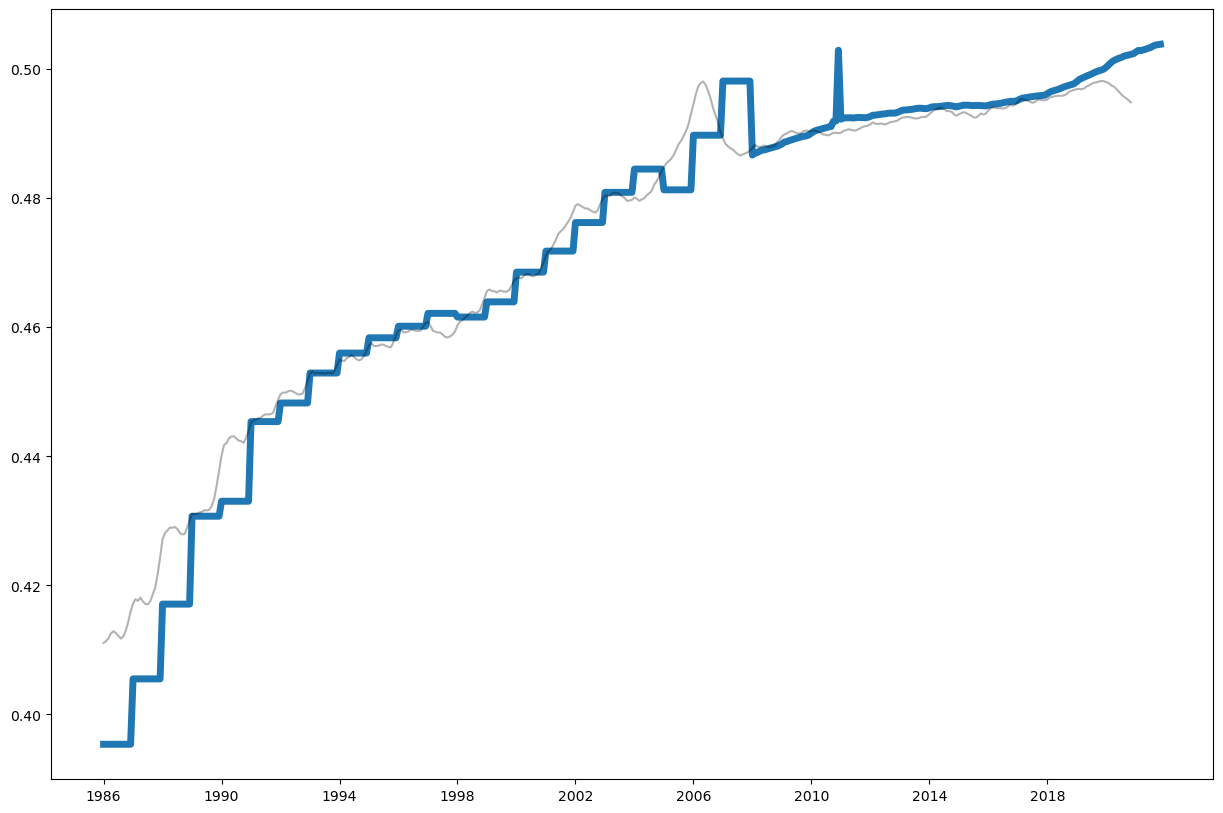

In [28]:
plt.figure(figsize=(15, 10))
plt.plot(y, linewidth=5)
plt.plot(model.predict(b, verbose=0), c='k', alpha=0.3)

plt.xticks([0, 48, 96, 144, 192, 240, 288, 336, 384], labels=[1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018])
plt.savefig('./documents/fig/lstm_fig.jpg')

plt.show()

In [29]:
model.save('./model/p_lstm.h5')